In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/telecom%20churn%20(cell2cell)/cell2celltrain.csv")
df.head(10)

,CustomerID,Churn,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,...,ReferralsMadeBySubscriber,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus
0,3000002,Yes,24.00,219.0,22.0,0.25,0.0,0.0,-157.0,-19.0,...,0,4,No,0,30,Yes,1-Highest,Suburban,Professional,No
1,3000010,Yes,16.99,10.0,17.0,0.00,0.0,0.0,-4.0,0.0,...,0,5,No,0,30,No,4-Medium,Suburban,Professional,Yes
2,3000014,No,38.00,8.0,38.0,0.00,0.0,0.0,-2.0,0.0,...,0,6,No,0,Unknown,No,3-Good,Town,Crafts,Yes
3,3000022,No,82.28,1312.0,75.0,1.24,0.0,0.0,157.0,8.1,...,0,6,No,0,10,No,4-Medium,Other,Other,No
4,3000026,Yes,17.14,0.0,17.0,0.00,0.0,0.0,0.0,-0.2,...,0,9,No,1,10,No,1-Highest,Other,Professional,Yes
5,3000030,No,38.05,682.0,52.0,0.25,0.0,0.0,148.0,-3.1,...,0,1,No,1,30,No,3-Good,Other,Other,Yes
6,3000038,No,31.66,26.0,30.0,0.25,0.0,0.0,60.0,4.0,...,0,9,No,1,30,No,1-Highest,Other,Self,Yes
7,3000042,No,62.13,98.0,66.0,2.48,0.0,0.0,24.0,6.8,...,0,6,No,0,30,No,1-Highest,Other,Professional,No
8,3000046,No,35.30,24.0,35.0,0.00,0.0,0.0,20.0,-0.3,...,0,9,No,0,80,No,1-Highest,Other,Other,Yes
9,3000050,No,81.00,1056.0,75.0,0.00,0.0,0.0,43.0,2.4,...,0,5,No,1,30,No,3-Good,Other,Professional,No


In [3]:
df.shape

(51047, 58)

In [4]:
df.dtypes

CustomerID                     int64
Churn                         object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnansweredCalls              float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
H

In [5]:
df['Churn'].value_counts()

No     36336
Yes    14711
Name: Churn, dtype: int64

In [6]:
for x in df.columns:
    if df[x].isnull().sum() != 0:
        print(x, df[x].isnull().sum())

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909


In [7]:
df.drop(['CustomerID'], axis=1, inplace=True)
df = df.dropna()

In [8]:
df['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [9]:
categoricals = list()
for x in df.columns:
    if df[x].dtype == 'object':
        categoricals.append(x)
df[categoricals].nunique()

ServiceArea                743
ChildrenInHH                 2
HandsetRefurbished           2
HandsetWebCapable            2
TruckOwner                   2
RVOwner                      2
Homeownership                2
BuysViaMailOrder             2
RespondsToMailOffers         2
OptOutMailings               2
NonUSTravel                  2
OwnsComputer                 2
HasCreditCard                2
NewCellphoneUser             2
NotNewCellphoneUser          2
OwnsMotorcycle               2
HandsetPrice                16
MadeCallToRetentionTeam      2
CreditRating                 7
PrizmCode                    4
Occupation                   8
MaritalStatus                3
dtype: int64

In [10]:
def plot_val_counts(df, col=''):
    plt.figure(figsize=(5,5))
    plt.grid(True)
    plt.bar(df[col][df.Churn==1].value_counts().index, 
            df[col][df.Churn==1].value_counts().values)
    plt.title(f'{col}')
    plt.xticks(rotation=-90)

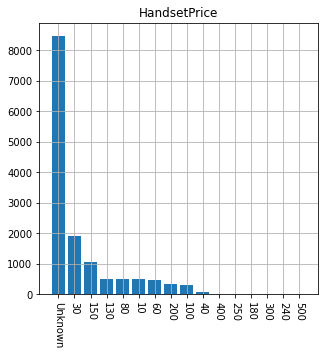

In [11]:
plot_val_counts(df, col='HandsetPrice')

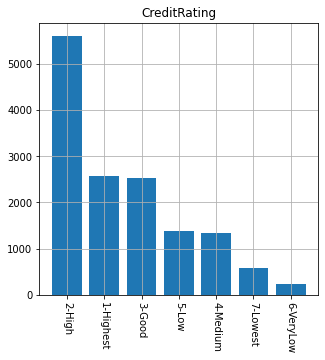

In [12]:
plot_val_counts(df, col='CreditRating')

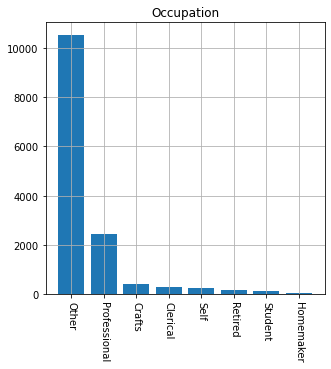

In [13]:
plot_val_counts(df, col='Occupation')

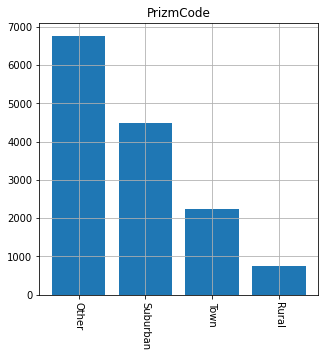

In [14]:
plot_val_counts(df, col='PrizmCode')

<AxesSubplot:>

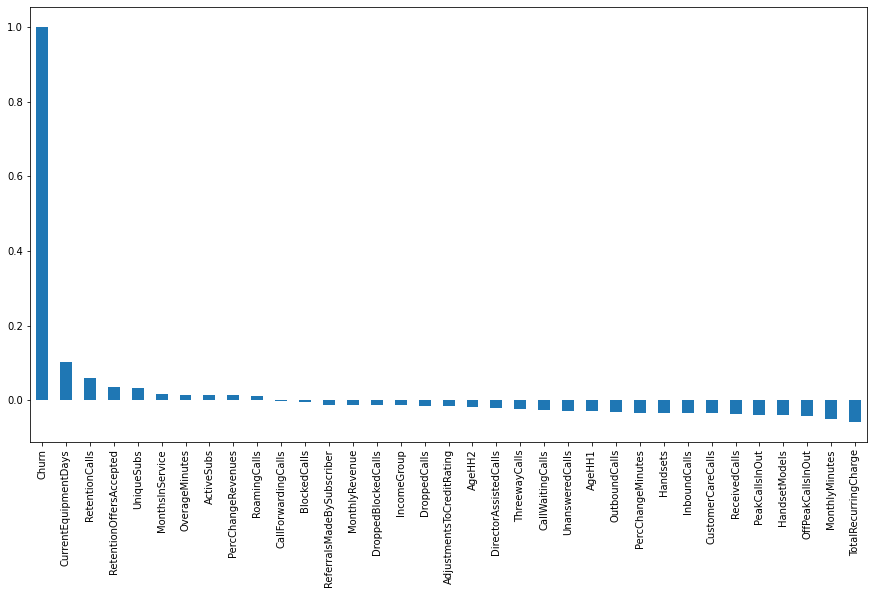

In [15]:
numericals = [x for x in df.columns if x not in categoricals]

plt.figure(figsize=(15,8))
df[numericals].corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [16]:
correlated_features = set()
correlation_matrix = df[numericals].corr()

for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
            colname1 = correlation_matrix.columns[i]
            colname2 = correlation_matrix.columns[j]
            if colname1 != 'Churn' and colname2 != 'Churn':
                if abs(correlation_matrix['Churn'][colname1]) > abs(correlation_matrix['Churn'][colname2]):
                    correlated_features.add(colname2)
                else:
                    correlated_features.add(colname1)
print(correlated_features)
df.drop(correlated_features, axis=1, inplace=True)

{'ReceivedCalls', 'BlockedCalls', 'Handsets'}


In [17]:
df_dummies = pd.get_dummies(df, drop_first=True)
X = df_dummies.drop(['Churn'], axis=1)
y = df_dummies['Churn']

In [18]:
features = X.columns.values
scaler = StandardScaler()
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16, stratify=y)

In [20]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(X_train, y_train)
importance = np.abs(lasso.coef_)
print(len([x for x in importance if x != 0]))

165


In [21]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(lasso).fit(X_train, y_train)

selected_feat = X_train.columns[(sfm.get_support())]
print(selected_feat)

X_train = sfm.transform(X_train)
X_test = sfm.transform(X_test)

Index(['MonthlyMinutes', 'TotalRecurringCharge', 'OverageMinutes',
       'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues',
       'DroppedCalls', 'CustomerCareCalls', 'InboundCalls',
       'DroppedBlockedCalls',
       ...
       'HandsetPrice_Unknown', 'MadeCallToRetentionTeam_Yes',
       'CreditRating_2-High', 'CreditRating_3-Good', 'CreditRating_4-Medium',
       'CreditRating_5-Low', 'PrizmCode_Rural', 'PrizmCode_Town',
       'Occupation_Self', 'MaritalStatus_Unknown'],
      dtype='object', length=164)


In [22]:
lr = LogisticRegression()

grid_values = {'C':[0.001,0.01,1,10]}#, 'penalty': ['l1', 'l2']}
grid_lr = GridSearchCV(lr, param_grid = grid_values)#, scoring = 'roc_auc')
grid_lr = grid_lr.fit(X_train, y_train)

y_pred = grid_lr.predict(X_test)
print('Test Accuracy Score for LogisticRegression : ', metrics.accuracy_score(y_test, y_pred))
print('Test Precision Score for LogisticRegression : ', metrics.precision_score(y_test, y_pred))
print('Test Recall Score for LogisticRegression: ', metrics.recall_score(y_test, y_pred))
print('Test F1 Score for LogisticRegression: ', metrics.f1_score(y_test, y_pred))
print('Test auc Score for LogisticRegression: ', metrics.roc_auc_score(y_test, y_pred))
print()
y_train_pred = grid_lr.predict(X_train)
print('Train Accuracy Score for LogisticRegression: ', metrics.accuracy_score(y_train, y_train_pred))
print('Train Precision Score for LogisticRegression: ', metrics.precision_score(y_train, y_train_pred))
print('Train Recall Score for LogisticRegression: ', metrics.recall_score(y_train, y_train_pred))
print('Train F1 Score for LogisticRegression: ', metrics.f1_score(y_train, y_train_pred))
print('Train auc Score for LogisticRegression: ', metrics.roc_auc_score(y_train, y_train_pred))

Test Accuracy Score for LogisticRegression :  0.7126921917395237
Test Precision Score for LogisticRegression :  0.4734042553191489
Test Recall Score for LogisticRegression:  0.03123903123903124
Test F1 Score for LogisticRegression:  0.05861047085940073
Test auc Score for LogisticRegression:  0.5086496479765981

Train Accuracy Score for LogisticRegression:  0.7163136604607925
Train Precision Score for LogisticRegression:  0.5686274509803921
Train Recall Score for LogisticRegression:  0.03817128817128817
Train F1 Score for LogisticRegression:  0.07154016939396432
Train auc Score for LogisticRegression:  0.513276807613192
